<a href="https://colab.research.google.com/github/MartinNde/MartinN_1/blob/main/NLP_Applied_AI_competition_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Importing** libraries

The libraries are the various tools required for manipulating and visualising data. Rendering the data in a format that can be loaded into a machine learning module. A clean and well formatted data will give rise to good predictions.

In [ ]:
# import libraries
import pandas as pd
import numpy as np

# libraries for data preprocessing
import nltk
# download modules available with NLTK
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# libraries for data split and feature extraction
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# library for evaluation
from sklearn import metrics

# libraries for ML algorithms
from sklearn import svm
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer

# libraries for data plotting
import seaborn as sns
import matplotlib.pyplot as plt 
import re
import string


RANDOM_SEED = 100


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Understanding the problem and dataset

The target is to predict sentiment of new tweets which could either be positive or negative.

The first step is to load and view the data set and the plot this on a graph to see the number of positives and negative visually.

In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
df.head()

,id,text,sentiment
0,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
1,088c60f138,my boss is bullying me...,negative
2,9642c003ef,what interview! leave me alone,negative
3,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive


In [ ]:
print(df.shape)

(16363, 3)


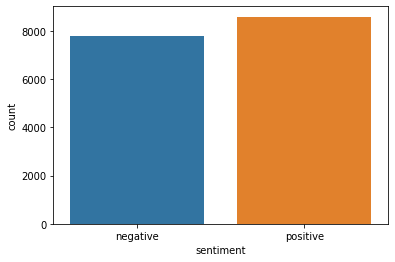

In [ ]:
# Summarise class details
sns.countplot(x=df['sentiment'])

View the data in numberical terms to see if there are any missing values and have an idea about the total number of the columns and row. Then check for missing values using drop.na.

print out the number of entries to see if anything has been dropped. In this case there were no missing values because the total number before drop is equl to the total number after drop.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16363 entries, 0 to 16362
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         16363 non-null  object
 1   text       16363 non-null  object
 2   sentiment  16363 non-null  object
dtypes: object(3)
memory usage: 383.6+ KB


In [ ]:
df = df.dropna()

In [ ]:
print(f'Number of entries :{len(df)}') # there were no mising values or entries since the entries are exactly the same as the original data

Number of entries :16363


In [ ]:
df.describe()

,id,text,sentiment
count,16363,16363,16363
unique,16363,16363,2
top,549e992a42,Sooo SAD I will miss you here in San Diego!!!,positive
freq,1,1,8582


#Data preprocessing 

The following techniques are used to process data:
tokenisation, text normalisation(lower casing, stemming and lemmatisation),stop word removal and puntuation.



In [ ]:
sent = df.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
print(sent)

  sentiment  text
1  positive  8582
0  negative  7781


In [ ]:
 #remove any URLs
df['text'] = df['text'].apply(lambda x: re.sub(r'http\S+', '', x))

df.head()
     

,id,text,sentiment
0,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
1,088c60f138,my boss is bullying me...,negative
2,9642c003ef,what interview! leave me alone,negative
3,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive


In [ ]:
#Lower Casing
df['text'] = df['text'].apply(lambda x: x.lower())

df.head()

,id,text,sentiment
0,549e992a42,sooo sad i will miss you here in san diego!!!,negative
1,088c60f138,my boss is bullying me...,negative
2,9642c003ef,what interview! leave me alone,negative
3,358bd9e861,"sons of ****, why couldn`t they put them on t...",negative
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive


In [ ]:
#Removing Punctuations
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

# apply the remove_punctuations function to the 'text' column of the data
df['text'] = df['text'].apply(remove_punctuations)

df.head()

,id,text,sentiment
0,549e992a42,sooo sad i will miss you here in san diego,negative
1,088c60f138,my boss is bullying me,negative
2,9642c003ef,what interview leave me alone,negative
3,358bd9e861,sons of why couldnt they put them on the rel...,negative
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive


In [ ]:
#Lower Casing
df['text'] = df['text'].apply(lambda x: x.lower())

df.head()

,id,text,sentiment
0,549e992a42,sooo sad i will miss you here in san diego,negative
1,088c60f138,my boss is bullying me,negative
2,9642c003ef,what interview leave me alone,negative
3,358bd9e861,sons of why couldnt they put them on the rel...,negative
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive


In [ ]:
# remove stopwords from tokens

# define set of English stopwords
stop_words = set(stopwords.words('english')) 

# Define a function to remove stop words from a sentence
def remove_stop_words(sentence):
    words = sentence.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_sentence = ' '.join(filtered_words)
    return filtered_sentence

# Apply the function to the 'text' column of the DataFrame
df['filtered_text'] = df['text'].apply(remove_stop_words)


# Print the first 5 rows of the DataFrame
print(df.head())

           id                                               text sentiment  \
0  549e992a42         sooo sad i will miss you here in san diego  negative   
1  088c60f138                             my boss is bullying me  negative   
2  9642c003ef                      what interview leave me alone  negative   
3  358bd9e861   sons of  why couldnt they put them on the rel...  negative   
4  6e0c6d75b1  2am feedings for the baby are fun when he is a...  positive   

                              filtered_text  
0                   sooo sad miss san diego  
1                             boss bullying  
2                     interview leave alone  
3  sons couldnt put releases already bought  
4         2am feedings baby fun smiles coos  


In [ ]:
#Removing Punctuations
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

# apply the remove_punctuations function to the 'text' column of the data
df['text'] = df['text'].apply(remove_punctuations)

df.head()

,id,text,sentiment,filtered_text
0,549e992a42,sooo sad i will miss you here in san diego,negative,sooo sad miss san diego
1,088c60f138,my boss is bullying me,negative,boss bullying
2,9642c003ef,what interview leave me alone,negative,interview leave alone
3,358bd9e861,sons of why couldnt they put them on the rel...,negative,sons couldnt put releases already bought
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive,2am feedings baby fun smiles coos


In [ ]:
# Tokenize text

tknzr = TweetTokenizer()
# iterate through each row in 'Text' columm and convert text to tokens
list_tokenized_text = [tknzr.tokenize(text) for text in df['text']]
print(list_tokenized_text[:2])

list_tokenized_sentences = [' '.join(tokens) for tokens in list_tokenized_text]
print(list_tokenized_sentences[:2])

# add new column to data frame
df['tokenized_text'] = list_tokenized_sentences #list_tokenized_text 

df.head()

[['sooo', 'sad', 'i', 'will', 'miss', 'you', 'here', 'in', 'san', 'diego'], ['my', 'boss', 'is', 'bullying', 'me']]
['sooo sad i will miss you here in san diego', 'my boss is bullying me']


,id,text,sentiment,filtered_text,tokenized_text
0,549e992a42,sooo sad i will miss you here in san diego,negative,sooo sad miss san diego,sooo sad i will miss you here in san diego
1,088c60f138,my boss is bullying me,negative,boss bullying,my boss is bullying me
2,9642c003ef,what interview leave me alone,negative,interview leave alone,what interview leave me alone
3,358bd9e861,sons of why couldnt they put them on the rel...,negative,sons couldnt put releases already bought,sons of why couldnt they put them on the relea...
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive,2am feedings baby fun smiles coos,2am feedings for the baby are fun when he is a...


In [ ]:
# create a Porter stemmer object
porter = PorterStemmer()

# define a function to apply the stemmer to a list of words
def stem_tweet(text):
    words = text.split()
    stemmed_words = [porter.stem(word) for word in words]
    return ' '.join(stemmed_words)

# apply the stemmer to the 'text' column of the DataFrame
df['stemmed_word'] = df['text'].apply(stem_tweet)

# print the first 5 rows of the DataFrame
print(df.head())

           id                                               text sentiment  \
0  549e992a42         sooo sad i will miss you here in san diego  negative   
1  088c60f138                             my boss is bullying me  negative   
2  9642c003ef                      what interview leave me alone  negative   
3  358bd9e861   sons of  why couldnt they put them on the rel...  negative   
4  6e0c6d75b1  2am feedings for the baby are fun when he is a...  positive   

                              filtered_text  \
0                   sooo sad miss san diego   
1                             boss bullying   
2                     interview leave alone   
3  sons couldnt put releases already bought   
4         2am feedings baby fun smiles coos   

                                      tokenized_text  \
0         sooo sad i will miss you here in san diego   
1                             my boss is bullying me   
2                      what interview leave me alone   
3  sons of why couldnt t

In [ ]:
wnl = WordNetLemmatizer()
lemma_word=wnl.lemmatize('ponies', pos='n')
print(lemma_word)

lemma_word=wnl.lemmatize('eating', pos='v')
print(lemma_word)

lemma_word=wnl.lemmatize('ate', pos='v')
print(lemma_word)

lemma_word=wnl.lemmatize('better', pos='a')
print(lemma_word)

pony
eat
eat
good


In [ ]:
wnl = WordNetLemmatizer()

list_lemmatized_sentences = []

# iterate through each list of tokens and lemmatize the tokens
for tokens in list_tokenized_text:
  lemma_words = [wnl.lemmatize(word) for word in tokens]
  lemma_sentence = ' '.join(lemma_words)
  list_lemmatized_sentences.append(lemma_sentence)
  
print(list_lemmatized_sentences[:2])

# add new column to data frame
df['lemmatized_text'] = list_lemmatized_sentences

df.head()

['sooo sad i will miss you here in san diego', 'my bos is bullying me']


,id,text,sentiment,filtered_text,tokenized_text,stemmed_word,lemmatized_text
0,549e992a42,sooo sad i will miss you here in san diego,negative,sooo sad miss san diego,sooo sad i will miss you here in san diego,sooo sad i will miss you here in san diego,sooo sad i will miss you here in san diego
1,088c60f138,my boss is bullying me,negative,boss bullying,my boss is bullying me,my boss is bulli me,my bos is bullying me
2,9642c003ef,what interview leave me alone,negative,interview leave alone,what interview leave me alone,what interview leav me alon,what interview leave me alone
3,358bd9e861,sons of why couldnt they put them on the rel...,negative,sons couldnt put releases already bought,sons of why couldnt they put them on the relea...,son of whi couldnt they put them on the releas...,son of why couldnt they put them on the releas...
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive,2am feedings baby fun smiles coos,2am feedings for the baby are fun when he is a...,2am feed for the babi are fun when he is all s...,2am feeding for the baby are fun when he is al...


In [ ]:
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

In [ ]:
# use raw text
X_train_text, X_val_text, y_train, y_val = train_test_split(df['text'], df['sentiment'], test_size=0.3, random_state=RANDOM_SEED)
print(f'training data set size: {len(X_train_text)}')
print(f'validation data set size: {len(X_val_text)}')

#use stop words
X_train_filtered_text, X_val_filtered_text, y_train, y_val = train_test_split(df['filtered_text'], df['sentiment'], test_size=0.3, random_state=RANDOM_SEED)
print(f'training data set size: {len(X_train_filtered_text)}')
print(f'validation data set size: {len(X_val_filtered_text)}')

# use tokenised text
X_train_tokenized_text, X_val_tokenized_text, y_train, y_val = train_test_split(df['tokenized_text'], df['sentiment'], test_size=0.3, random_state=RANDOM_SEED)
print(f'training data set size: {len(X_train_tokenized_text)}')
print(f'validation data set size: {len(X_val_tokenized_text)}')

#use stemmed text
X_train_stemmed_word, X_val_stemmed_word, y_train, y_val = train_test_split(df['stemmed_word'], df['sentiment'], test_size=0.3, random_state=RANDOM_SEED)
print(f'training data set size: {len(X_train_stemmed_word)}')
print(f'validation data set size: {len(X_val_stemmed_word)}')


# use lemmatized text
X_train_lemmatized_text, X_val_lemmatized_text, y_train, y_val = train_test_split(df['lemmatized_text'], df['sentiment'], test_size=0.3, random_state=RANDOM_SEED)
print(f'training data set size: {len(X_train_lemmatized_text)}')
print(f'validation data set size: {len(X_val_lemmatized_text)}')

# define class_names to using with plot_confusion_matrix
class_list = ['positive', 'negative']

training data set size: 11454
validation data set size: 4909
training data set size: 11454
validation data set size: 4909
training data set size: 11454
validation data set size: 4909
training data set size: 11454
validation data set size: 4909
training data set size: 11454
validation data set size: 4909


In [ ]:
# plotting confusion matrix
def plot_confusion_matrix(matrix, class_names):
    plt.clf()
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Set2_r)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    s = [['TP','FN'], ['FP', 'TN']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(matrix[i][j]))
    plt.show()

# method to calculate evaluation results
def evaluate(actuals, predictions, class_names):
  accuracy = metrics.accuracy_score(actuals, predictions)
  confusion_matrix = metrics.confusion_matrix(actuals, predictions, labels=class_names)
  return accuracy, confusion_matrix

In [ ]:
# method to train and predict using SVM classifier
def svm_predictions(X_train, X_val, y_train, y_val, class_names):
  # build model
  clf = svm.SVC(kernel='linear', random_state=RANDOM_SEED) 
  clf.fit(X_train, y_train)

  # Make predictions on test data
  y_pred = clf.predict(X_val)

  # evalution
  accuracy, confusion_matrix = evaluate(y_val, y_pred, class_names)
  print(f'Accuracy: {accuracy}')
  plot_confusion_matrix(confusion_matrix, class_names)

  return clf

**Module** **1**

Accuracy: 0.8602566714198411


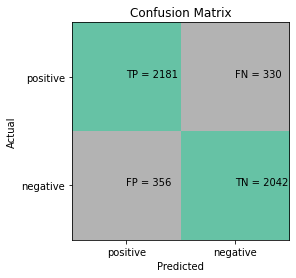

In [ ]:
vectorizer1 = CountVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer1.fit(X_train_text)

# convert train and test text data to numeric vectors
X_train = vectorizer1.transform(X_train_text)
X_val = vectorizer1.transform(X_val_text)

m1 = svm_predictions(X_train, X_val, y_train, y_val, class_list)

**Module** **2**

Accuracy: 0.8677938480342229


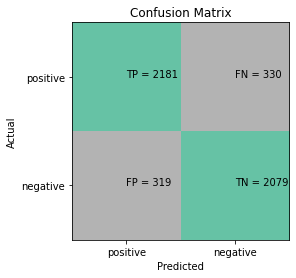

In [ ]:
vectorizer2 = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer2.fit(X_train_text)

# convert train and test text data to numeric vectors
X_train = vectorizer2.transform(X_train_text)
X_val = vectorizer2.transform(X_val_text)

m2 = svm_predictions(X_train, X_val, y_train, y_val, class_list)

**Module** **3**

Accuracy: 0.8447749032389489


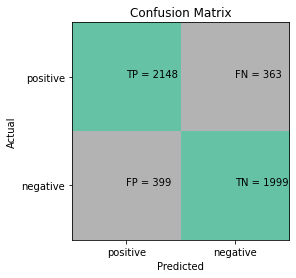

In [ ]:
vectorizer3 = CountVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer3.fit(X_train_filtered_text)

# convert train and test text data to numeric vectors
X_train = vectorizer3.transform(X_train_filtered_text)
X_val = vectorizer3.transform(X_val_filtered_text)

m3 = svm_predictions(X_train, X_val, y_train, y_val, class_list)

**Module** **4**

In [ ]:
vectorizer4 = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer4.fit(X_train_filtered_text)

# convert train and test text data to numeric vectors
X_train = vectorizer4.transform(X_train_filtered_text)
X_val = vectorizer4.transform(X_val_filtered_text)

m4 = svm_predictions(X_train, X_val, y_train, y_val, class_list)

**Module** **5**

In [ ]:
vectorizer5 = CountVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer5.fit(X_train_tokenized_text)
# convert train and test text data to numeric vectors
X_train = vectorizer5.transform(X_train_tokenized_text)
X_val = vectorizer5.transform(X_val_tokenized_text)

m5 = svm_predictions(X_train, X_val, y_train, y_val, class_list)

**Module** **6**

In [ ]:
vectorizer6 = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer6.fit(X_train_tokenized_text)
# convert train and test text data to numeric vectors
X_train = vectorizer6.transform(X_train_tokenized_text)
X_val = vectorizer6.transform(X_val_tokenized_text)

m6 = svm_predictions(X_train, X_val, y_train, y_val, class_list)

**Module** **7**

In [ ]:
vectorizer7 = CountVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer7.fit(X_train_stemmed_word)
# convert train and test text data to numeric vectors
X_train = vectorizer7.transform(X_train_stemmed_word)
X_val = vectorizer7.transform(X_val_stemmed_word)

m7 = svm_predictions(X_train, X_val, y_train, y_val, class_list)

**Module** **8**

In [ ]:
vectorizer8 = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer8.fit(X_train_stemmed_word)
# convert train and test text data to numeric vectors
X_train = vectorizer8.transform(X_train_stemmed_word)
X_val = vectorizer8.transform(X_val_stemmed_word)

M8 = svm_predictions(X_train, X_val, y_train, y_val, class_list)

**Module** **9**

In [ ]:
vectorizer9 = CountVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer9.fit(X_train_lemmatized_text)
# convert train and test text data to numeric vectors
X_train = vectorizer9.transform(X_train_lemmatized_text)
X_val = vectorizer9.transform(X_val_lemmatized_text)

m9 = svm_predictions(X_train, X_val, y_train, y_val, class_list)

In [ ]:
vectorizer10 = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer10.fit(X_train_lemmatized_text)
# convert train and test text data to numeric vectors
X_train = vectorizer10.transform(X_train_lemmatized_text)
X_val = vectorizer10.transform(X_val_lemmatized_text)

m10 = svm_predictions(X_train, X_val, y_train, y_val, class_list)

#Using Naive Bayes to predict.

In [ ]:
# method to train and predict using Decision Tree
def gnb_predictions(X_train, X_val, y_train, y_val, class_list):
  # build model
  clf = GaussianNB()
  clf.fit(X_train.toarray(), y_train)

  # Make predictions on test data
  y_pred = clf.predict(X_val.toarray())

  # evalution
  accuracy, confusion_matrix = evaluate(y_val, y_pred, class_list)
  print(f'Accuracy: {accuracy}')
  plot_confusion_matrix(confusion_matrix, class_list)

  return clf

* **Model** **1**

In [ ]:
vectorizer21 = CountVectorizer()
vectorizer21.fit(X_train_text)
X_train = vectorizer21.transform(X_train_text)
X_val = vectorizer21.transform(X_val_text)

m21 = gnb_predictions(X_train, X_val, y_train, y_val, class_list)

**DT** **Model** **2**

In [ ]:
vectorizer22 = TfidfVectorizer()
vectorizer22.fit(X_train_text)
X_train = vectorizer22.transform(X_train_text)
X_val = vectorizer22.transform(X_val_text)

m22 = gnb_predictions(X_train, X_val, y_train, y_val, class_list)

**DT** **Model** **3**

In [ ]:
vectorizer23 = CountVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer23.fit(X_train_filtered_text)

# convert train and test text data to numeric vectors
X_train = vectorizer23.transform(X_train_filtered_text)
X_val = vectorizer23.transform(X_val_filtered_text)

m23 = gnb_predictions(X_train, X_val, y_train, y_val, class_list)

Module 8 has produced the best results. The test dataset is now applied on module 8 since this will produced the best results as indicated by the training data set.

**Importing the test data set**

In [ ]:
df_test = pd.read_csv('/content/test.csv')

Visualiation of the test data set.

In [ ]:
df_test.head()

In [ ]:

# create a Porter stemmer object
porter = PorterStemmer()

# define a function to apply the stemmer to a list of words
def stem_tweet(text):
    words = text.split()
    stemmed_words = [porter.stem(word) for word in words]
    return ' '.join(stemmed_words)

# apply the stemmer to the 'text' column of the DataFrame
df['stemmed_word'] = df['text'].apply(stem_tweet)

wnl = WordNetLemmatizer()

list_lemmatized_sentences = []

# iterate through each list of tokens and lemmatize the tokens
for tokens in list_tokenized_text:
  lemma_words = [wnl.lemmatize(word) for word in tokens]
  lemma_sentence = ' '.join(lemma_words)
  list_lemmatized_sentences.append(lemma_sentence)
  
print(list_lemmatized_sentences[:2])

# add new column to data frame
df['lemmatized_text'] = list_lemmatized_sentences

df.head()

In [ ]:

 #remove any URLs
df_test['text'] = df_test['text'].apply(lambda x: re.sub(r'http\S+', '', x))
df_test.head()

#Lower Casing
df_test['text'] = df_test['text'].apply(lambda x: x.lower())


#Removing Punctuations
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

# apply the remove_punctuations function to the 'text' column of the data
df_test['text'] = df_test['text'].apply(remove_punctuations)


# define set of English stopwords
stop_words = set(stopwords.words('english')) 

# Define a function to remove stop words from a sentence
def remove_stop_words(sentence):
    words = sentence.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_sentence = ' '.join(filtered_words)
    return filtered_sentence

# Apply the function to the 'text' column of the DataFrame
df_test['filtered_text'] = df_test['text'].apply(remove_stop_words)

# Print the first 5 rows of the DataFrame
print(df_test.head())

Tokenization

Words/ strings are broken down to small units which makes up a part of language data. The tokenizer model used is the TweeTokenizer model because we are dealing with tweets.

In [ ]:
# Tokenize text

tknzr = TweetTokenizer()
# iterate through each row in 'Text' columm and convert text to tokens
list_tokenized_text = [tknzr.tokenize(text) for text in df_test['text']]
print(list_tokenized_text[:2])

list_tokenized_sentences = [' '.join(tokens) for tokens in list_tokenized_text]
print(list_tokenized_sentences[:2])

# add new column to data frame
df_test['tokenized_text'] = list_tokenized_sentences #list_tokenized_text 
df_test.head()

In [ ]:
# create a Porter stemmer object
porter = PorterStemmer()

# define a function to apply the stemmer to a list of words
def stem_tweet(text):
    words = text.split()
    stemmed_words = [porter.stem(word) for word in words]
    return ' '.join(stemmed_words)

# apply the stemmer to the 'text' column of the DataFrame
df_test['stemmed_word'] = df_test['text'].apply(stem_tweet)
df_test.head()

Normalisation 

This process is some form of simplification of the language. The data or text is transform to a standard form by taking out lower casing, removing prefixes and surfixes - stemming and or lemmatisation.
This process improves the efficiency and effectivness of the predictions and also takes care of parsity.

**Lemmatisation**

In [ ]:
wnl = WordNetLemmatizer()

list_lemmatized_sentences = []

# iterate through each list of tokens and lemmatize the tokens
for tokens in list_tokenized_text:
  lemma_words = [wnl.lemmatize(word) for word in tokens]
  lemma_sentence = ' '.join(lemma_words)
  list_lemmatized_sentences.append(lemma_sentence)
  
print(list_lemmatized_sentences[:2])

# add new column to data frame
df_test['lemmatized_text'] = list_lemmatized_sentences

df_test.head()

In [ ]:
X_test = vectorizer8.transform(df_test['stemmed_word'])
predictions = m8.predict(X_test)
print(predictions)

In [ ]:
df_test['predicted_sentiment']= predictions
df_test.head()

In [ ]:
df_test.to_csv('/content/test-predictions.csv',index=True)

In [ ]:
import json

import pandas as pd

test_file_path = "/content/test-predictions.csv"
df_test = pd.read_csv(test_file_path)
df_test = df_test[["id", "predicted_sentiment"]]

data = []
for index, row in df_test.iterrows():
    data.append({'id': row['id'], 'prediction': row['predicted_sentiment']})

print(data[0:5])

submission_file_path = "submission.json"
with open(submission_file_path, 'w') as fp:
    fp.write('\n'.join(json.dumps(i) for i in data))